# Exploratory Analysis of California State Board of Pharmacy Sterile Compounding Licenses

The pharmacy data utilized in this analysis was retrieved from the California State Board of Pharmacy License Verification Database on 11/24/2024 at 2:53pm CST.  Please visit https://search.dca.ca.gov/results for more information. 

## Notebook Setup

In [10]:
pip install matplotlib

     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.9 kB ? eta -:--:--
     --------------- --------------------- 71.7/167.9 kB 777.7 kB/s eta 0:00:01
     -------------------------------------- 167.9/167.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB 10.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 20.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/7.8 MB 32.4 MB/s eta 0:00:01
   ---------------------------------------  7.7/7.8 MB 44.8 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 41.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/221.0 kB ? eta -:--:--
   ---------------------------------------- 221.0/221.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -----------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\bvlma\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set pandas to display more rows/columns for wider dataframes
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)     # Adjust rows
pd.set_option('display.width', 1000)       # Increase width for better visibility

#pd.reset_option('all') 

## Load Pharmacy Data

In [4]:
pharmacies = pd.read_csv('pharmacy_data.csv')
pharmacies.head()

,Title,License Number,License Type,License Status,Expiration Date,City,State,County,Zip
0,3RD ST. YOUTH CLINIC,CLE 4375,LICENSE TYPE: CLINIC (GOVERNMENT OWNED),LICENSE STATUS: CLEAR,"EXPIRATION DATE: AUGUST 1, 2025",CITY: SAN FRANCISCO,STATE: CALIFORNIA,COUNTY: SAN FRANCISCO,ZIP: 94124
1,5TH AVENUE PUBLIC HEALTH SERVICES,CLE 1391,LICENSE TYPE: CLINIC (GOVERNMENT OWNED),LICENSE STATUS: CANCELLED,"EXPIRATION DATE: NOVEMBER 1, 2006",CITY: SAN DIEGO,STATE: CALIFORNIA,COUNTY: SAN DIEGO,ZIP: 92103
2,77TH STREET JAIL CLINIC,CLE 1310,LICENSE TYPE: CLINIC (GOVERNMENT OWNED),LICENSE STATUS: CLEAR,"EXPIRATION DATE: NOVEMBER 1, 2025",CITY: LOS ANGELES,STATE: CALIFORNIA,COUNTY: LOS ANGELES,ZIP: 90003
3,"ABAJIAN, HOURY BARSOUMIAN",APH 10319,LICENSE TYPE: ADVANCED PRACTICE PHARMACIST,LICENSE STATUS: CLEAR,"EXPIRATION DATE: DECEMBER 31, 2026",CITY: BEVERLY HILLS,STATE: CALIFORNIA,COUNTY: LOS ANGELES,ZIP: 90210
4,"ABASI, RABIE NIDAL",APH 11380,LICENSE TYPE: ADVANCED PRACTICE PHARMACIST,LICENSE STATUS: CLEAR,"EXPIRATION DATE: OCTOBER 31, 2025",CITY: SANTEE,STATE: CALIFORNIA,COUNTY: SAN DIEGO,ZIP: 92071


## Inspect Pharmacy Data

The below cells provide statistics and summaries of the entire dataset. 

In [5]:
#Review summary statistics for the numeric columns
pharmacies.describe()

,Title,License Number,License Type,License Status,Expiration Date,City,State,County,Zip
count,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,20,20,2,3,14,17,1,10,19
top,3RD ST. YOUTH CLINIC,CLE 4375,LICENSE TYPE: ADVANCED PRACTICE PHARMACIST,LICENSE STATUS: CLEAR,"EXPIRATION DATE: NOVEMBER 1, 2025",CITY: SAN DIEGO,STATE: CALIFORNIA,COUNTY: LOS ANGELES,ZIP: 92103
freq,100,100,1400,1700,300,300,2000,600,200


In [6]:
#Review datatypes and memory usage
pharmacies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            2000 non-null   object
 1   License Number   2000 non-null   object
 2   License Type     2000 non-null   object
 3   License Status   2000 non-null   object
 4   Expiration Date  2000 non-null   object
 5   City             2000 non-null   object
 6   State            2000 non-null   object
 7   County           2000 non-null   object
 8   Zip              2000 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


In [7]:
#Review unique titles in pharmacy table
pharmacies['Title'].value_counts()

Title
3RD ST. YOUTH CLINIC                 100
5TH AVENUE PUBLIC HEALTH SERVICES    100
77TH STREET JAIL CLINIC              100
ABAJIAN, HOURY BARSOUMIAN            100
ABASI, RABIE NIDAL                   100
ABBAS, SHAIDA MOHAMMAD               100
ABDUL NOUR, CHADI                    100
ABOU-KARAM, NADA MOHAMED             100
ABRAHAM, JESSICA MARELENE            100
ABRAHAM, JOSEPH EMAD                 100
ADAMIAN, ANNA MARIE                  100
ADAMS, LISA JEAN                     100
ADAMS, MICHAEL DON                   100
ADAMS, PETRA INES                    100
ADELANTO COMMUNITY HEALTH CENTER     100
ADULT MEDICATION CLINIC              100
ADULT URGENT CARE CENTER             100
AFSHAR, ANAHITA                      100
AFZAL, SHAMA PELWASHA                100
AGHAJANIAN, BERSABEH                 100
Name: count, dtype: int64

In [8]:
#Count any null values 
pharmacies.isnull().sum()

Title              0
License Number     0
License Type       0
License Status     0
Expiration Date    0
City               0
State              0
County             0
Zip                0
dtype: int64

## Exploring the Pharmacy Data Visually

The below cells are an initial analysis of the pharmacy data utilizing matplotlib.pyplot.  

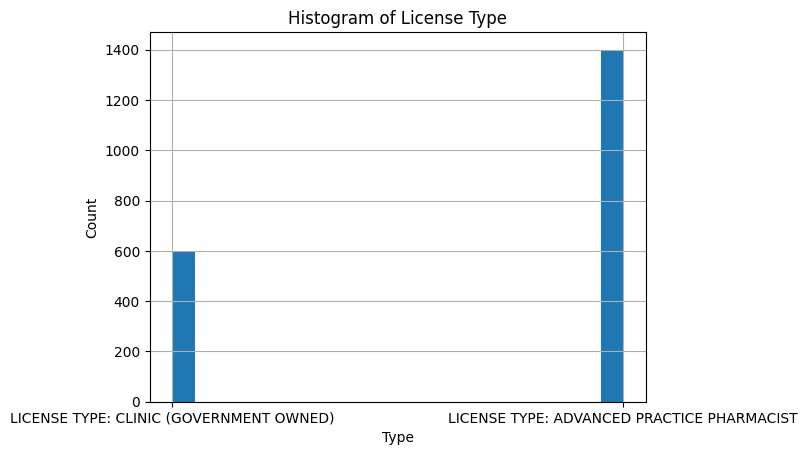

In [12]:
#Create a histogram of the License Type distribution
pharmacies['License Type'].hist(bins=20)
plt.title('Histogram of License Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

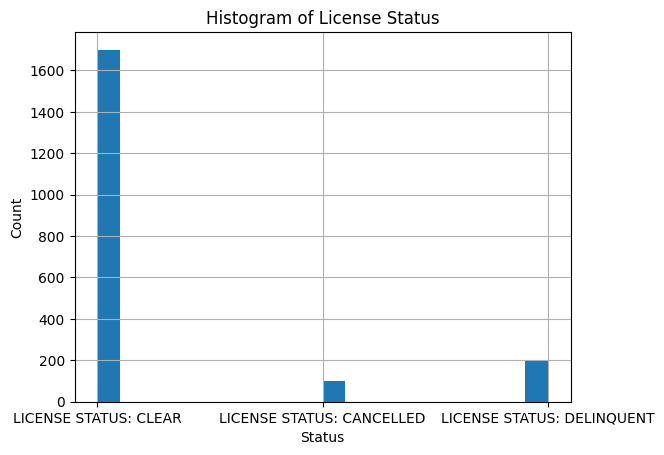

In [13]:
#Create a histogram of the License Status distribution
pharmacies['License Status'].hist(bins=20)
plt.title('Histogram of License Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()